# Short Term Investment

## Stochastic



![picture 1](../images/8f13fb47af9892c491ef93aec041115b5440af01fd6c246dd2ff241101be8682.png)  

![picture 2](../images/6ce78111cebba7a346007d3d3d1f2ff80859f85f8d9e60c008b0e55abfe2ee31.png)  


Slow K : 스토캐스틱 전략은 들쭉 날쭉이 심하다. 이를 유연화 하기 위해서 이동평균을 사용한다. 
- 스토캐스틱의 이동 평균 값

Sow D : Slow K 를 한번더 유연화 하기 위해서 Slow K 를 다시 한번 이동편균 한 값


### 전략 1 : 평균 회귀

Slow K is under the 20 -> 과매도 구간 : 저렴 - 매수

Slow k is over than 80 -> 과매수 구간 : 비쌈 - 매도

### 전략 2 : 모멘텀 투자

Slow K - Slow D > 0 : 상승 추세 - 매수

Slow K - Slow D < 0 : 하락 추세 - 매도



In [1]:
import os, sys
import pandas as pd
import numpy as np
from datetime import datetime
import finterstellar as fs
import json
sys.path.append('../')
from stock import *

Error. The stochastic indicator requires OHLC data and symbol. Try get_ohlc() to retrieve price data.


TypeError: string indices must be integers, not 'str'

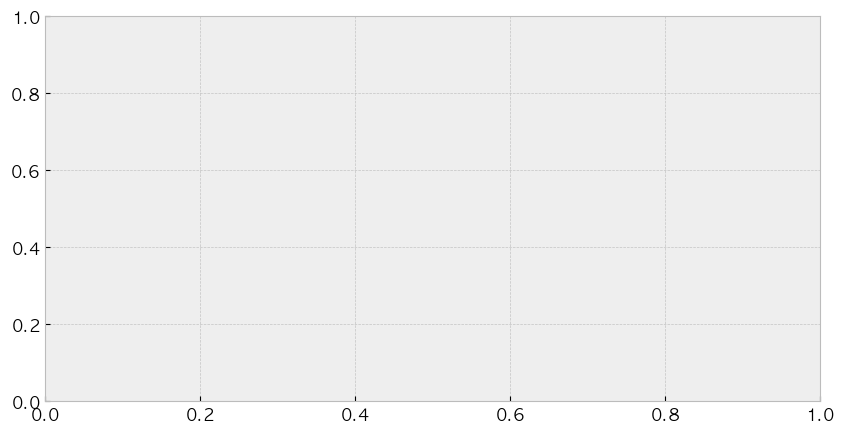

In [8]:
dal = get_ohlc('DAL',datetime(2020, 1,1), datetime(2021,1,1))
dal_stochastic = get_stochastic(dal, factor='DAL')

print(f'{dal_stochastic}')
draw_chart(dal_stochastic, left='slow_k', right="DAL")


In [ ]:
add_signal_df(dal_stochastic, 'slow_k', 20, 80)

draw_chart(dal_stochastic, left = 'Close', right ='position_chart')

dal_stochastic_eval, result = get_evaluate_column(dal_stochastic)

draw_trade_results(dal_stochastic_eval)


In [ ]:
change_sto = get_stochastic(dal)
change_sto['indi'] = change_sto['slow_k'] - change_sto['slow_d']
add_signal_df(change_sto, 'indi', 0, 0)

add_position_df(change_sto)
sto_eval, result= get_evaluate_column(change_sto)
draw_trade_results(sto_eval)